In [20]:
import pickle
import pandas as pd
from sklearn import tree

model = pickle.load(open("data/temp_density_tree-gs.model.sav", "rb"))
features = (
    pd.read_csv("data/density_train.csv", sep=";", decimal=",")
    .drop(["T"], axis=1)
    .columns.values.tolist()
)

rules = tree.export_text(model, feature_names=features)
print(rules)

|--- Density <= 1.21
|   |--- TiO2 <= 0.03
|   |   |--- Density <= 1.07
|   |   |   |--- value: [48.33]
|   |   |--- Density >  1.07
|   |   |   |--- Al2O3 <= 0.18
|   |   |   |   |--- Density <= 1.08
|   |   |   |   |   |--- value: [37.50]
|   |   |   |   |--- Density >  1.08
|   |   |   |   |   |--- value: [27.50]
|   |   |   |--- Al2O3 >  0.18
|   |   |   |   |--- value: [50.00]
|   |--- TiO2 >  0.03
|   |   |--- Density <= 1.19
|   |   |   |--- TiO2 <= 0.18
|   |   |   |   |--- value: [50.00]
|   |   |   |--- TiO2 >  0.18
|   |   |   |   |--- value: [65.00]
|   |   |--- Density >  1.19
|   |   |   |--- value: [40.00]
|--- Density >  1.21
|   |--- value: [25.00]



In [21]:
from src.rules import get_rules


rules = get_rules(model, features)
display(len(rules))
rules

8

[if (Density > 1.208) -> 25.0,
 if (Density <= 1.208) and (TiO2 <= 0.025) and (Density > 1.067) and (Al2O3 <= 0.175) and (Density > 1.079) -> 27.5,
 if (Density <= 1.208) and (TiO2 <= 0.025) and (Density > 1.067) and (Al2O3 <= 0.175) and (Density <= 1.079) -> 37.5,
 if (Density <= 1.208) and (TiO2 <= 0.025) and (Density > 1.067) and (Al2O3 > 0.175) -> 50.0,
 if (Density <= 1.208) and (TiO2 > 0.025) and (Density <= 1.193) and (TiO2 <= 0.175) -> 50.0,
 if (Density <= 1.208) and (TiO2 > 0.025) and (Density <= 1.193) and (TiO2 > 0.175) -> 65.0,
 if (Density <= 1.208) and (TiO2 > 0.025) and (Density > 1.193) -> 40.0,
 if (Density <= 1.208) and (TiO2 <= 0.025) and (Density <= 1.067) -> 48.333]

In [22]:
from src.rules import normalise_rules


rules = normalise_rules(rules)
display(len(rules))
rules

8

[if (Density > 1.208) -> 25.0,
 if (Density <= 1.208) and (Density > 1.067) and (TiO2 <= 0.025) and (Al2O3 <= 0.175) -> 27.5,
 if (Density <= 1.208) and (Density > 1.067) and (TiO2 <= 0.025) and (Al2O3 <= 0.175) -> 37.5,
 if (Density <= 1.208) and (Density > 1.067) and (TiO2 <= 0.025) and (Al2O3 > 0.175) -> 50.0,
 if (Density <= 1.208) and (TiO2 > 0.025) and (TiO2 <= 0.175) -> 50.0,
 if (Density <= 1.208) and (TiO2 > 0.025) -> 65.0,
 if (Density <= 1.208) and (Density > 1.193) and (TiO2 > 0.025) -> 40.0,
 if (Density <= 1.208) and (TiO2 <= 0.025) -> 48.333]

In [23]:
from src.rules import delete_same_rules


rules = delete_same_rules(rules)
display(len(rules))
rules

7

[if (Density > 1.208) -> 25.0,
 if (Density <= 1.208) and (Density > 1.067) and (TiO2 <= 0.025) and (Al2O3 <= 0.175) -> 32.5,
 if (Density <= 1.208) and (Density > 1.067) and (TiO2 <= 0.025) and (Al2O3 > 0.175) -> 50.0,
 if (Density <= 1.208) and (TiO2 > 0.025) and (TiO2 <= 0.175) -> 50.0,
 if (Density <= 1.208) and (TiO2 > 0.025) -> 65.0,
 if (Density <= 1.208) and (Density > 1.193) and (TiO2 > 0.025) -> 40.0,
 if (Density <= 1.208) and (TiO2 <= 0.025) -> 48.333]

In [24]:
train = pd.read_csv("data/density_train.csv", sep=";", decimal=",")
test = pd.read_csv("data/density_test.csv", sep=";", decimal=",")

train["Density"] = train["Density"]
test["Density"] = test["Density"]

display(train.head(3))
display(test.head(3))
train.describe().transpose()

T  Al2O3  TiO2  Density
0  20    0.0   0.0  1.06250
1  25    0.0   0.0  1.05979
2  35    0.0   0.0  1.05404

T  Al2O3  TiO2  Density
0  30   0.00   0.0  1.05696
1  55   0.00   0.0  1.04158
2  25   0.05   0.0  1.08438

count       mean        std       min       25%        50%  \
T         38.0  45.526316  16.513282  20.00000  31.25000  45.000000   
Al2O3     38.0   0.078947   0.126080   0.00000   0.00000   0.000000   
TiO2      38.0   0.057895   0.108133   0.00000   0.00000   0.000000   
Density   38.0   1.108180   0.060772   1.03182   1.05763   1.082755   

               75%      max  
T        60.000000  70.0000  
Al2O3     0.050000   0.3000  
TiO2      0.050000   0.3000  
Density   1.169058   1.2186

In [25]:
from src.rules import simplify_rules

rules = simplify_rules(train, rules)
display(len(rules))
rules

7

[if (Density = 1.219) -> 25.0,
 if (Density = 1.138) and (TiO2 = 0.0) and (Al2O3 = 0.0) -> 32.5,
 if (Density = 1.138) and (TiO2 = 0.0) and (Al2O3 = 0.3) -> 50.0,
 if (Density = 1.032) and (TiO2 = 0.1) -> 50.0,
 if (Density = 1.032) and (TiO2 = 0.3) -> 65.0,
 if (Density = 1.2) and (TiO2 = 0.3) -> 40.0,
 if (Density = 1.032) and (TiO2 = 0.0) -> 48.333]

/Users/user/Projects/python/fuzzy-rules-generator/.venv/lib/python3.12/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


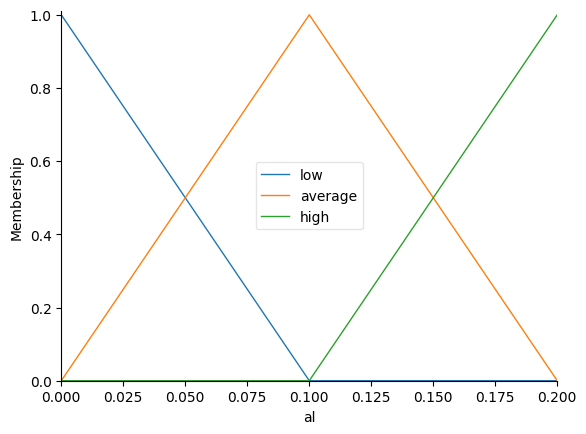

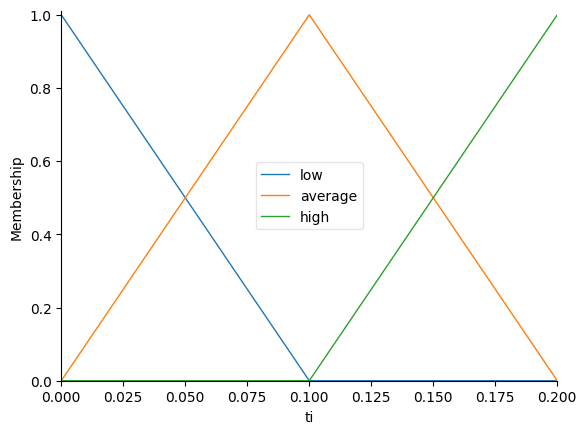

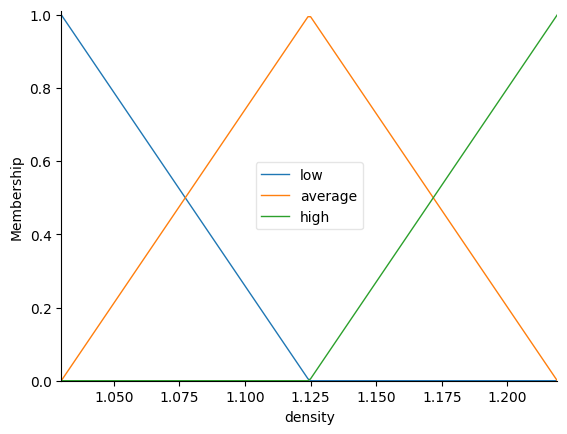

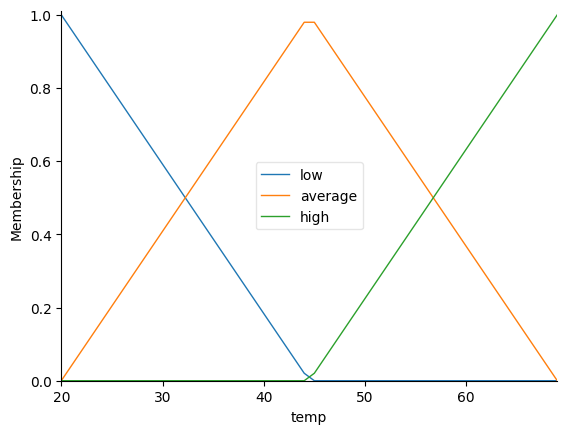

In [126]:
import numpy as np
from skfuzzy import control as ctrl
import skfuzzy as fuzz

al = ctrl.Antecedent(np.arange(0, 0.3, 0.1), "al")
ti = ctrl.Antecedent(np.arange(0, 0.3, 0.1), "ti")
density = ctrl.Antecedent(np.arange(1.03, 1.22, 0.001), "density")
# temp = ctrl.Consequent(train["T"].sort_values().unique(), "temp")
temp = ctrl.Consequent(np.arange(20, 70, 1), "temp")

al.automf(3, variable_type="quant")
al.view()
ti.automf(3, variable_type="quant")
ti.view()
density.automf(3, variable_type="quant")
density.view()
temp.automf(3, variable_type="quant")
temp.view()

In [127]:
from src.rules import get_fuzzy_rules

fuzzy_variables = {"Al2O3": al, "TiO2": ti, "Density": density, "consequent": temp}
fuzzy_rules = get_fuzzy_rules(rules, fuzzy_variables)
fuzzy_rules.remove(fuzzy_rules[5])

fuzzy_cntrl = ctrl.ControlSystem(fuzzy_rules)

sim = ctrl.ControlSystemSimulation(fuzzy_cntrl, lenient=False)

display(len(fuzzy_rules))
fuzzy_rules

6

[IF density[high] THEN temp[low]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (density[average] AND ti[low]) AND al[low] THEN temp[average]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (density[average] AND ti[low]) AND al[high] THEN temp[average]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF density[low] AND ti[average] THEN temp[average]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF density[low] AND ti[high] THEN temp[high]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF density[low] AND ti[low] THEN temp[average]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax]

 Antecedents 
Antecedent: density                 = 1.056
  - low                             : 0.7248677248676944
  - average                         : 0.27513227513230565
  - high                            : 0.0
Antecedent: ti                      = 0.0
  - low                             : 1.0
  - average                         : 0.0
  - high                            : 0.0
Antecedent: al                      = 0.0
  - low                             : 1.0
  - average                         : 0.0
  - high                            : 0.0

 Rules 
RULE #0:
  IF density[high] THEN temp[low]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - density[high]                                          : 0.0
                                             density[high] = 0.0
  Activation (THEN-clause):
                                                 temp[low] : 0.0

RULE #1:
  IF (density[average] AND ti[low]) AND al[low] THEN temp[average]
	AN

np.float64(44.500000000000014)

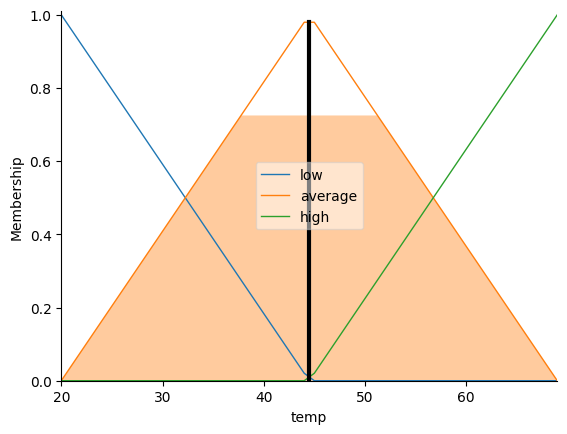

In [128]:
sim.input["al"] = 0.0
sim.input["ti"] = 0.0
sim.input["density"] = 1.056
sim.compute()
sim.print_state()
display(sim.output["temp"])
temp.view(sim=sim)

In [129]:
from sklearn import metrics
import math


def fuzzy_pred(row):
    sim.input["al"] = row["Al2O3"]
    sim.input["ti"] = row["TiO2"]
    sim.input["density"] = row["Density"]
    sim.compute()
    return sim.output["temp"]


def rmse(row):
    return math.sqrt(metrics.mean_squared_error([row["Real"]], [row["Inferred"]]))


result_train = train.copy()
result_train["Real"] = result_train["T"]
result_train["Inferred"] = result_train.apply(fuzzy_pred, axis=1)
result_train["RMSE"] = result_train.apply(rmse, axis=1)
result_train = result_train.round({"RMSE": 3})
result_train.head(15)

T  Al2O3  TiO2  Density  Real  Inferred  RMSE
0   20   0.00   0.0  1.06250    20      44.5  24.5
1   25   0.00   0.0  1.05979    25      44.5  19.5
2   35   0.00   0.0  1.05404    35      44.5   9.5
3   40   0.00   0.0  1.05103    40      44.5   4.5
4   45   0.00   0.0  1.04794    45      44.5   0.5
5   50   0.00   0.0  1.04477    50      44.5   5.5
6   60   0.00   0.0  1.03826    60      44.5  15.5
7   65   0.00   0.0  1.03484    65      44.5  20.5
8   70   0.00   0.0  1.03182    70      44.5  25.5
9   20   0.05   0.0  1.08755    20      44.5  24.5
10  45   0.05   0.0  1.07105    45      44.5   0.5
11  50   0.05   0.0  1.06760    50      44.5   5.5
12  55   0.05   0.0  1.06409    55      44.5  10.5
13  65   0.05   0.0  1.05691    65      44.5  20.5
14  70   0.05   0.0  1.05291    70      44.5  25.5

In [130]:
result_test = test.copy()
result_test["Real"] = result_test["T"]
result_test["Inferred"] = result_test.apply(fuzzy_pred, axis=1)
result_test["RMSE"] = result_test.apply(rmse, axis=1)
result_test = result_test.round({"RMSE": 3})
result_test

T  Al2O3  TiO2  Density  Real   Inferred    RMSE
0   30   0.00  0.00  1.05696    30  44.500000  14.500
1   55   0.00  0.00  1.04158    55  44.500000  10.500
2   25   0.05  0.00  1.08438    25  44.500000  19.500
3   30   0.05  0.00  1.08112    30  44.500000  14.500
4   35   0.05  0.00  1.07781    35  44.500000   9.500
5   40   0.05  0.00  1.07446    40  44.500000   4.500
6   60   0.05  0.00  1.06053    60  44.500000  15.500
7   35   0.30  0.00  1.17459    35  41.203154   6.203
8   65   0.30  0.00  1.14812    65  43.774218  21.226
9   45   0.00  0.05  1.07424    45  44.500000   0.500
10  50   0.00  0.05  1.07075    50  44.500000   5.500
11  55   0.00  0.05  1.06721    55  44.500000  10.500
12  20   0.00  0.30  1.22417    20  28.173467   8.173
13  30   0.00  0.30  1.21310    30  28.203443   1.797
14  40   0.00  0.30  1.20265    40  28.381994  11.618
15  60   0.00  0.30  1.18265    60  29.046887  30.953
16  70   0.00  0.30  1.17261    70  29.494924  40.505

In [131]:
rmetrics = {}
rmetrics["RMSE_train"] = math.sqrt(
    metrics.mean_squared_error(result_train["Real"], result_train["Inferred"])
)
rmetrics["RMSE_test"] = math.sqrt(
    metrics.mean_squared_error(result_test["Real"], result_test["Inferred"])
)
rmetrics["RMAE_test"] = math.sqrt(
    metrics.mean_absolute_error(result_test["Real"], result_test["Inferred"])
)
rmetrics["R2_test"] = metrics.r2_score(result_test["Real"], result_test["Inferred"])

rmetrics

{'RMSE_train': 17.346274819328222,
 'RMSE_test': 16.61905460694073,
 'RMAE_test': 3.6418737424931766,
 'R2_test': -0.2947245753808614}